In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ind = [i for i in range(0,801)]
df = pd.read_csv("result_velocities_10x5_5151_nu20_f4000_newriecker_mu0_step800_49try_bordercond.txt", sep=" ", names=ind, index_col=False)

In [3]:
df_elem = pd.read_csv("elements_df_10x5_5151.txt", names=['id', 'node1', 'node2', 'node3', 'node4'])

df_nodes = pd.read_csv("nodes_df_10x5_5151.txt", names=['ind', 'x', 'y'])

In [5]:
df_elem[(df_elem.node1 == 2726)]

,id,node1,node2,node3,node4
2550,2551.0,2726.0,2727.0,2826.0,2825.0


In [18]:
number = 1156
for i in range(1, int(np.sqrt(number))):
    if number % i == 0:
        print(i)

1
2
4
17


In [22]:
number / 4.0

289.0

In [4]:
df_nodes[(df_nodes.x == 0) & (df_nodes.y == 0)]#.iloc[100:120]

,ind,x,y
2575,2726.0,0.0,0.0


In [16]:
df1000 = df

def print_one(num):
#     del mesh
#     del pred
    
    for index in  df_elem.id:

        node1 = df_elem[df_elem.id == index].node1.values[0]
        node2 = df_elem[df_elem.id == index].node2.values[0]
        node3 = df_elem[df_elem.id == index].node3.values[0]
        node4 = df_elem[df_elem.id == index].node4.values[0]

        x1 = df_nodes[df_nodes.ind == node1].x.values[0]
        x2 = df_nodes[df_nodes.ind == node2].x.values[0]
        y1 = df_nodes[df_nodes.ind == node1].y.values[0]
        y2 = df_nodes[df_nodes.ind == node4].y.values[0]

        test_v = np.array([np.sqrt(df1000.loc[2*(node1-1), num]**2 + df1000.loc[2*(node1-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node2-1), num]**2 + df1000.loc[2*(node2-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node3-1), num]**2 + df1000.loc[2*(node3-1)+1, num]**2),
                           np.sqrt(df1000.loc[2*(node4-1), num]**2 + df1000.loc[2*(node4-1)+1, num]**2)])

        def interpolate_test(xi, eta):
            N1 = (1-xi) * (1-eta) / 4.0
            N2 = (1+xi) * (1-eta) / 4.0
            N3 = (1+xi) * (1+eta) / 4.0
            N4 = (1-xi) * (1+eta) / 4.0

            res = N1 * test_v[0] + N2 * test_v[1] \
                + N3 * test_v[2] + N4 * test_v[3]
            return res

        NUM = 4
        gridX = np.linspace(x2, x1, NUM)
        gridY = np.linspace(y2, y1, NUM)

        meshX, meshY = np.meshgrid(gridX, gridY)

        meshXY = np.dstack((meshX, meshY)).reshape(NUM**2, 2)

        predX = np.linspace(1,-1,NUM)
        predY = np.linspace(1,-1,NUM)
        predX, predY = np.meshgrid(predY, predX)
        predXY = np.dstack((predX, predY)).reshape(NUM**2, 2)
        predict = interpolate_test(predXY[:, 0], predXY[:, 1])

        try:
            pred = np.concatenate((pred, predict), axis=0)
            mesh = np.concatenate((mesh, meshXY), axis=0)
        except:
            pred = np.array(predict)
            mesh = np.array(meshXY)

    fig, ax = plt.subplots(figsize=(10,6))

#     fig = plt.figure(figsize=(6,10))
    plt.scatter(mesh[:, 0], mesh[:, 1], c=pred, alpha=0.2)
    # plt.scatter(meshXY[:, 0], meshXY[:, 1], c=pred[:10000], alpha=0.2)
#     cmap = mpl.cm.get_cmap('RdBu', N) 
#     cs = ax.pcolor(a, cmap=cmap)
#     cbar = fig.colorbar(cs)
    plt.axis('equal')
    plt.xlim(2.5, -2.5)
    plt.show()

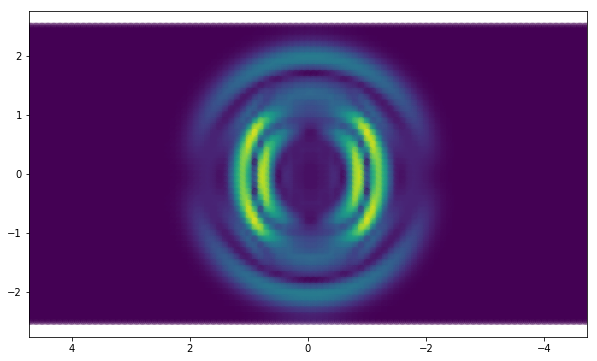

In [17]:
print_one(70)